In [1]:
from tensorflow.python.keras.applications import VGG16

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(100,100,3))

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [3]:
resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

In [4]:
import numpy as np
import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
model.summary()

filepath="VGG16_fine_tuned_Indus_Fruits_4_classes_100_100_1st Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                147488    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 14,862,308
Trainable params: 14,862,308
Non-trainable params: 0
_________________________________________________________________


In [5]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 1600 images belonging to 4 classes.
Found 160 images belonging to 4 classes.
Found 320 images belonging to 4 classes.


In [6]:
number_of_training_samples=1600
number_of_validation_samples=160
number_of_test_samples=320

In [7]:
import math

history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=100,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 24s 237ms/step - loss: 0.9743 - categorical_accuracy: 0.6162 - val_loss: 0.3954 - val_categorical_accuracy: 0.8875
Epoch 2/100
100/100 [==============================] - 21s 207ms/step - loss: 0.6400 - categorical_accuracy: 0.7919 - val_loss: 0.1619 - val_categorical_accuracy: 0.9750
Epoch 3/100
100/100 [==============================] - 20s 201ms/step - loss: 0.3433 - categorical_accuracy: 0.9075 - val_loss: 0.3546 - val_categorical_accuracy: 0.9000
Epoch 4/100
100/100 [==============================] - 20s 202ms/step - loss: 0.2478 - categorical_accuracy: 0.9425 - val_loss: 0.3344 - val_categorical_accuracy: 0.9062
Epoch 5/100
100/100 [==============================] - 20s 202ms/step - loss: 0.2458 - categorical_accuracy: 0.9369 - val_loss: 0.3590 - val_categorical_accuracy: 0.8625
Epoch 6/100
100/100 [==============================] - 20s 202ms/step - loss: 0.2399 - categorical_acc

100/100 [==============================] - 20s 202ms/step - loss: 0.0928 - categorical_accuracy: 0.9806 - val_loss: 0.1298 - val_categorical_accuracy: 0.9688
Epoch 31/100
100/100 [==============================] - 20s 202ms/step - loss: 0.0669 - categorical_accuracy: 0.9862 - val_loss: 0.0827 - val_categorical_accuracy: 0.9937
Epoch 32/100
100/100 [==============================] - 20s 202ms/step - loss: 0.0883 - categorical_accuracy: 0.9837 - val_loss: 0.1761 - val_categorical_accuracy: 0.9625
Epoch 33/100
100/100 [==============================] - 20s 202ms/step - loss: 0.0971 - categorical_accuracy: 0.9781 - val_loss: 0.1462 - val_categorical_accuracy: 0.9750
Epoch 34/100
100/100 [==============================] - 20s 202ms/step - loss: 0.0499 - categorical_accuracy: 0.9900 - val_loss: 0.0688 - val_categorical_accuracy: 0.9875
Epoch 35/100
100/100 [==============================] - 20s 202ms/step - loss: 0.0746 - categorical_accuracy: 0.9844 - val_loss: 0.1216 - val_categorical_accu

100/100 [==============================] - 28s 279ms/step - loss: 0.0557 - categorical_accuracy: 0.9869 - val_loss: 0.1076 - val_categorical_accuracy: 0.9812
Epoch 61/100
100/100 [==============================] - 27s 266ms/step - loss: 0.0304 - categorical_accuracy: 0.9912 - val_loss: 0.3230 - val_categorical_accuracy: 0.9625
Epoch 62/100
100/100 [==============================] - 27s 270ms/step - loss: 0.0855 - categorical_accuracy: 0.9800 - val_loss: 0.1355 - val_categorical_accuracy: 0.9750
Epoch 63/100
100/100 [==============================] - 26s 264ms/step - loss: 0.0540 - categorical_accuracy: 0.9875 - val_loss: 0.0667 - val_categorical_accuracy: 0.9937
Epoch 64/100
100/100 [==============================] - 27s 273ms/step - loss: 0.0608 - categorical_accuracy: 0.9869 - val_loss: 0.0800 - val_categorical_accuracy: 0.9688
Epoch 65/100
100/100 [==============================] - 27s 266ms/step - loss: 0.0237 - categorical_accuracy: 0.9969 - val_loss: 0.0988 - val_categorical_accu

100/100 [==============================] - 17s 170ms/step - loss: 0.0252 - categorical_accuracy: 0.9944 - val_loss: 0.0493 - val_categorical_accuracy: 0.9812
Epoch 91/100
100/100 [==============================] - 17s 170ms/step - loss: 0.0204 - categorical_accuracy: 0.9950 - val_loss: 0.0703 - val_categorical_accuracy: 0.9937
Epoch 92/100
100/100 [==============================] - 17s 169ms/step - loss: 0.0208 - categorical_accuracy: 0.9962 - val_loss: 0.1506 - val_categorical_accuracy: 0.9750
Epoch 93/100
100/100 [==============================] - 17s 169ms/step - loss: 0.0380 - categorical_accuracy: 0.9900 - val_loss: 0.0572 - val_categorical_accuracy: 0.9875
Epoch 94/100
100/100 [==============================] - 17s 170ms/step - loss: 0.0790 - categorical_accuracy: 0.9837 - val_loss: 0.2243 - val_categorical_accuracy: 0.9250
Epoch 95/100
100/100 [==============================] - 17s 171ms/step - loss: 0.0741 - categorical_accuracy: 0.9819 - val_loss: 0.1096 - val_categorical_accu

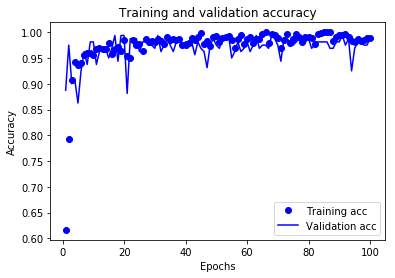

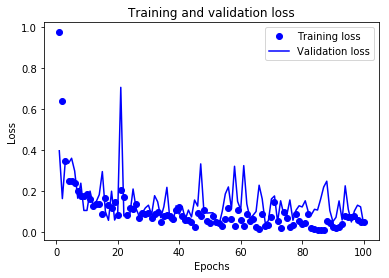

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
from tensorflow.python.keras.models import load_model

best_model = load_model('VGG16_fine_tuned_Indus_Fruits_4_classes_100_100_1st Experiment.h5')

In [10]:
from tensorflow.python.keras.models import load_model

steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

20/20 [==============================] - 2s 81ms/step - loss: 0.0962 - categorical_accuracy: 0.9719
Test-set accuracy: 97.19%


In [11]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [12]:
filepath="VGG16_fine_tuned_Indus_Fruits_4_classes_100_100_1st Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

In [13]:
best_model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-5),metrics=['categorical_accuracy'])

In [14]:
history = best_model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=100,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_test_samples//batch_size))

Epoch 1/100
100/100 [==============================] - 19s 193ms/step - loss: 0.0232 - categorical_accuracy: 0.9981 - val_loss: 0.0709 - val_categorical_accuracy: 0.9875
Epoch 2/100
100/100 [==============================] - 17s 171ms/step - loss: 0.0188 - categorical_accuracy: 0.9987 - val_loss: 0.0752 - val_categorical_accuracy: 0.9875
Epoch 3/100
100/100 [==============================] - 18s 177ms/step - loss: 0.0163 - categorical_accuracy: 0.9987 - val_loss: 0.0488 - val_categorical_accuracy: 0.9937
Epoch 4/100
100/100 [==============================] - 17s 171ms/step - loss: 0.0162 - categorical_accuracy: 0.9987 - val_loss: 0.0648 - val_categorical_accuracy: 0.9875
Epoch 5/100
100/100 [==============================] - 17s 171ms/step - loss: 0.0221 - categorical_accuracy: 0.9969 - val_loss: 0.0656 - val_categorical_accuracy: 0.9875
Epoch 6/100
100/100 [==============================] - 18s 176ms/step - loss: 0.0211 - categorical_accuracy: 0.9981 - val_loss: 0.0385 - val_categoric

100/100 [==============================] - 17s 173ms/step - loss: 0.0126 - categorical_accuracy: 0.9981 - val_loss: 0.0228 - val_categorical_accuracy: 0.9937
Epoch 32/100
100/100 [==============================] - 17s 172ms/step - loss: 0.0093 - categorical_accuracy: 1.0000 - val_loss: 0.0183 - val_categorical_accuracy: 0.9937
Epoch 33/100
100/100 [==============================] - 17s 171ms/step - loss: 0.0090 - categorical_accuracy: 1.0000 - val_loss: 0.0238 - val_categorical_accuracy: 0.9937
Epoch 34/100
100/100 [==============================] - 17s 171ms/step - loss: 0.0101 - categorical_accuracy: 0.9994 - val_loss: 0.0394 - val_categorical_accuracy: 0.9937
Epoch 35/100
100/100 [==============================] - 17s 172ms/step - loss: 0.0085 - categorical_accuracy: 1.0000 - val_loss: 0.0325 - val_categorical_accuracy: 0.9937
Epoch 36/100
100/100 [==============================] - 18s 181ms/step - loss: 0.0096 - categorical_accuracy: 0.9994 - val_loss: 0.0113 - val_categorical_accu

100/100 [==============================] - 17s 173ms/step - loss: 0.0070 - categorical_accuracy: 1.0000 - val_loss: 0.0665 - val_categorical_accuracy: 0.9937
Epoch 62/100
100/100 [==============================] - 17s 173ms/step - loss: 0.0067 - categorical_accuracy: 1.0000 - val_loss: 0.0680 - val_categorical_accuracy: 0.9937
Epoch 63/100
100/100 [==============================] - 17s 171ms/step - loss: 0.0067 - categorical_accuracy: 1.0000 - val_loss: 0.0704 - val_categorical_accuracy: 0.9937
Epoch 64/100
100/100 [==============================] - 17s 172ms/step - loss: 0.0065 - categorical_accuracy: 1.0000 - val_loss: 0.0705 - val_categorical_accuracy: 0.9937
Epoch 65/100
100/100 [==============================] - 17s 173ms/step - loss: 0.0071 - categorical_accuracy: 0.9994 - val_loss: 0.0801 - val_categorical_accuracy: 0.9875
Epoch 66/100
100/100 [==============================] - 17s 172ms/step - loss: 0.0064 - categorical_accuracy: 1.0000 - val_loss: 0.0808 - val_categorical_accu

100/100 [==============================] - 17s 170ms/step - loss: 0.0063 - categorical_accuracy: 0.9994 - val_loss: 0.0727 - val_categorical_accuracy: 0.9875
Epoch 92/100
100/100 [==============================] - 17s 170ms/step - loss: 0.0057 - categorical_accuracy: 1.0000 - val_loss: 0.0709 - val_categorical_accuracy: 0.9937
Epoch 93/100
100/100 [==============================] - 17s 170ms/step - loss: 0.0058 - categorical_accuracy: 1.0000 - val_loss: 0.0769 - val_categorical_accuracy: 0.9875
Epoch 94/100
100/100 [==============================] - 17s 170ms/step - loss: 0.0053 - categorical_accuracy: 1.0000 - val_loss: 0.0768 - val_categorical_accuracy: 0.9875
Epoch 95/100
100/100 [==============================] - 17s 169ms/step - loss: 0.0066 - categorical_accuracy: 0.9994 - val_loss: 0.0784 - val_categorical_accuracy: 0.9875
Epoch 96/100
100/100 [==============================] - 17s 170ms/step - loss: 0.0085 - categorical_accuracy: 0.9987 - val_loss: 0.0972 - val_categorical_accu

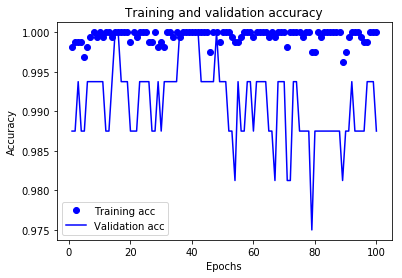

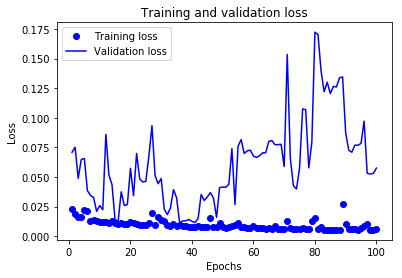

In [17]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
best_model_fine_tuned = load_model('VGG16_fine_tuned_Indus_Fruits_4_classes_100_100_1st Experiment.h5')

In [16]:
steps_test=int(number_of_test_samples/batch_size)
result = best_model_fine_tuned.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

20/20 [==============================] - 1s 58ms/step - loss: 0.0702 - categorical_accuracy: 0.9844
Test-set accuracy: 98.44%


In [18]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (320, 100, 100, 3)
Total number of labels: (320, 1)


In [19]:
# Evaluation on test dataset

test_loss, test_score = best_model_fine_tuned.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

320/320 [==============================] - 2s 5ms/sample - loss: 0.0702 - categorical_accuracy: 0.9844
Loss on test set:  0.07022219412028789
Accuracy on test set:  0.984375


In [20]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(320,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

320/320 [==============================] - 1s 3ms/sample
(320, 1)
(320, 1)


<Figure size 432x288 with 0 Axes>

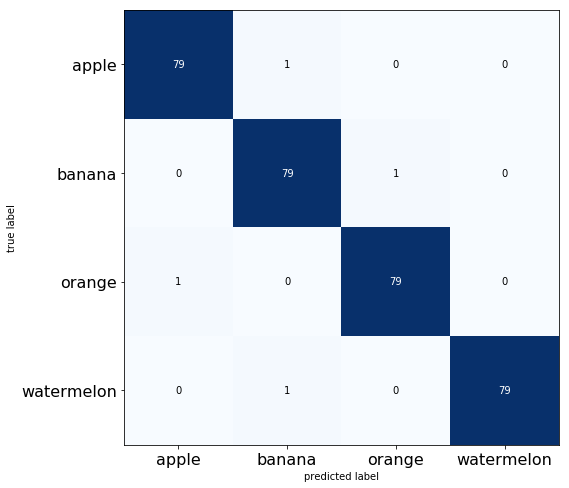

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(4), ['apple', 'banana','orange','watermelon'], fontsize=16)
plt.yticks(range(4), ['apple', 'banana','orange','watermelon'], fontsize=16)
plt.show()